<a href="https://colab.research.google.com/github/huyunwei/robust/blob/main/stress_strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stress-Strength Interference Model
The stress-strength model is a fundamental concept in reliability engineering and design that assesses the reliability or probability of failure of a system, component, or structure by comparing the applied stress to the strength of the material or component. The basic idea is that for a component to function reliably, its strength (the capacity to withstand loads or forces) must exceed the stress (the load or force applied) it experiences during operation.
## Stress-Strength Interference Model for two known distributions
In reality, stress and strength are not deterministic. LLet us assume that we can describe stress and strength as continuous random variables with parametric probability density functions.  
### Stress (\(S\)):
- Stress represents the demands, loads, pressures, or forces applied to a component. It can vary due to operational conditions, environmental factors, or the way the component is used.

### Strength (\(R\)):
- Strength is the ability of the component to withstand stress without failure. It reflects the material properties, design, manufacturing quality, and sometimes the degradation over time.

### Probability of Failure (\(P_f\)):
The probability of failure occurs when the applied stress exceeds the component's strength (\(P(S > R)\)). In other words, it is the probability that the strength of a component is less than or equal to the applied stress. 

f either the stress or strength distributions are not Normal Distributions, the analytical method above can not be used and integration is required.

The equation to find the probability of failure any two distributions is: $\text{Probability of failure} =\int^{\infty}_{0} \left( f_{strength} \times R_{stress} \right)$


Where  is the PDF and  is the SF. The above integral can be evaluated using the trapz function in numpy: `probability of failure = np.trapezoid(strength.PDF(x) * stress.SF(x), x)`

### Monte Carlo Simulation  
We can use Monte Carlo simulation to randomly sample both the stress and strength variables to estimate the probability of failure in a system or component. This approach offers several advantages:
Monte Carlo Simulation Process
	1.	Distribution Selection: Choose appropriate probability distributions to model stress and strength based on historical data, expert knowledge, or theoretical considerations.
	2.	Random Sampling: Generate a large number of random samples from both the stress and strength distributions.
	3.	Comparison: For each pair of samples, compare the stress value to the strength value. A failure occurs when stress exceeds strength.
	4.	Failure Probability Estimation: Calculate the proportion of comparisons where failure occurs to estimate the overall probability of failure.


## Application:
The stress-strength model is widely used in the design phase to ensure the reliability of components and systems. By understanding and quantifying the stress and strength distributions, designers and engineers can make informed decisions to reduce the probability of failure, such as by selecting appropriate materials, design adjustments, or safety factors.

This model emphasizes the importance of variability and uncertainty in both applied stresses and material strengths. It provides a quantitative method to assess the impact of this variability on system reliability, helping in the identification of potential failure points and the development of more robust designs.

## Stress-Strength Interference for two Normal Distributions
If both stress and strength are considered as random variables with known probability distributions, the probability of failure can be calculated by integrating the joint probability density function (PDF) of stress and strength over the region where stress exceeds strength. However, when stress (\(S\)) and strength (\(R\)) are independent and normally distributed, the probability of failure can be simplified and calculated using:

$$P_f = P(S > R) = \Phi\left(\frac{\mu_S - \mu_R}{\sqrt{\sigma_S^2 + \sigma_R^2}}\right)$$

where:
- $\mu_S$ and $\mu_R$ are the mean values of stress and strength, respectively,
- $\sigma_S^2$ and $\sigma_R^2$ are the variances of stress and strength, respectively,
- $\Phi$ is the cumulative distribution function (CDF) of the standard normal distribution.

Probability of failure (Monte Carlo simulation): 0.038787
Probability of failure (normal equation): 0.038550


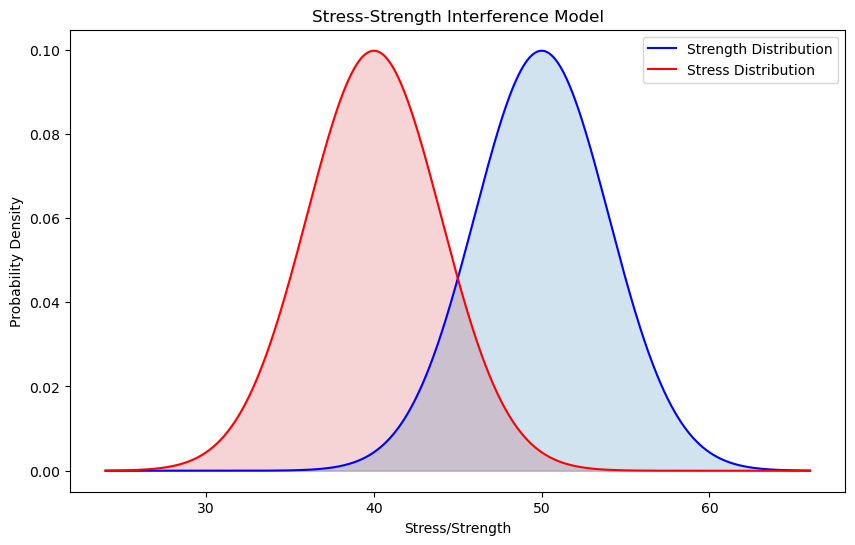

In [10]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


class StressStrengthNormal:
    def __init__(self, mean_strength, std_strength, mean_stress, std_stress):
        """
        Initialize the stress-strength model with means and standard deviations for strength and stress distributions.
        Assuming both stress and strength are random variables that follow normal distributions. 

        Args:
        - mean_strength (float): Mean of the strength distribution.
        - std_strength (float): Standard deviation of the strength distribution.
        - mean_stress (float): Mean of the stress distribution.
        - std_stress (float): Standard deviation of the stress distribution.
        """
        self.mean_strength = mean_strength
        self.std_strength = std_strength
        self.mean_stress = mean_stress
        self.std_stress = std_stress


    
    def probability_of_failure(self, method='equation'):
        """
    Calculates the probability of failure given the means and standard deviations
    of stress and strength distributions.

    Args:
    - mean_stress (float): Mean of the stress distribution.
    - std_stress (float): Standard deviation of the stress distribution.
    - mean_strength (float): Mean of the strength distribution.
    - std_strength (float): Standard deviation of the strength distribution.
    - method (str): Calculation method ('equation' or 'monte_carlo').

    Returns:
    - float: Probability of failure.
            """
        if method == 'equation':
            # Calculate the Z score
            Z = (self.mean_strength - self.mean_stress) / np.sqrt(self.std_stress**2 + self.std_strength**2)
            # Calculate the probability of failure using the standard normal CDF
            probability_failure = norm.cdf(-Z)
            return probability_failure
    
        elif method == 'monte_carlo':
            # Number of simulations
            n_simulations = 1000000
            # Generate random samples from normal distributions for stress and strength
            stress_samples = np.random.normal(self.mean_stress, self.std_stress, n_simulations)
            strength_samples = np.random.normal(self.mean_strength, self.std_strength, n_simulations)
            # Calculate failure instances
            failures = stress_samples > strength_samples
            # Calculate probability of failure
            probability_failure = np.mean(failures)
            return probability_failure
    
        else:
            raise ValueError("Method not recognized. Use 'equation' or 'monte_carlo'.")

    def plot_distributions(self):
        """
        Plot the stress and strength distributions to visualize the overlap.
        """
        # Generate a range of x-values for plotting
        x = np.linspace(
            min(self.mean_strength - 4 * self.std_strength, self.mean_stress - 4 * self.std_stress),
            max(self.mean_strength + 4 * self.std_strength, self.mean_stress + 4 * self.std_stress),
            1000,
        )

        # Calculate the corresponding normal distribution for strength and stress
        strength_distribution = norm.pdf(x, self.mean_strength, self.std_strength)
        stress_distribution = norm.pdf(x, self.mean_stress, self.std_stress)

        # Plot the distributions
        plt.figure(figsize=(10, 6))
        plt.plot(x, strength_distribution, label="Strength Distribution", color='b')
        plt.plot(x, stress_distribution, label="Stress Distribution", color='r')
        plt.fill_between(x, stress_distribution, 
                         color='tab:red', alpha=0.2, 
                         )
        plt.fill_between(x, strength_distribution, 
                         # where=(strength_distribution < stress_distribution ), 
                         color='tab:blue', alpha=0.2, )
        plt.xlabel("Stress/Strength")
        plt.ylabel("Probability Density")
        plt.title("Stress-Strength Interference Model")
        plt.legend()
        plt.show()

#example
ssa = StressStrengthNormal(
    mean_stress = 40,  # Mean of stress distribution,
    std_stress = 4,   # Standard deviation of stress distribution
    mean_strength = 50,  # Mean of strength distribution
    std_strength = 4   # Standard deviation of strength distribution
)

print(f"Probability of failure (Monte Carlo simulation): {ssa.probability_of_failure(method = 'monte_carlo'):.6f}")
print(f"Probability of failure (normal equation): {ssa.probability_of_failure():.6f}")
ssa.plot_distributions()


Probability of failure (Monte Carlo simulation): 0.038583
Probability of failure (normal equation): 0.038550


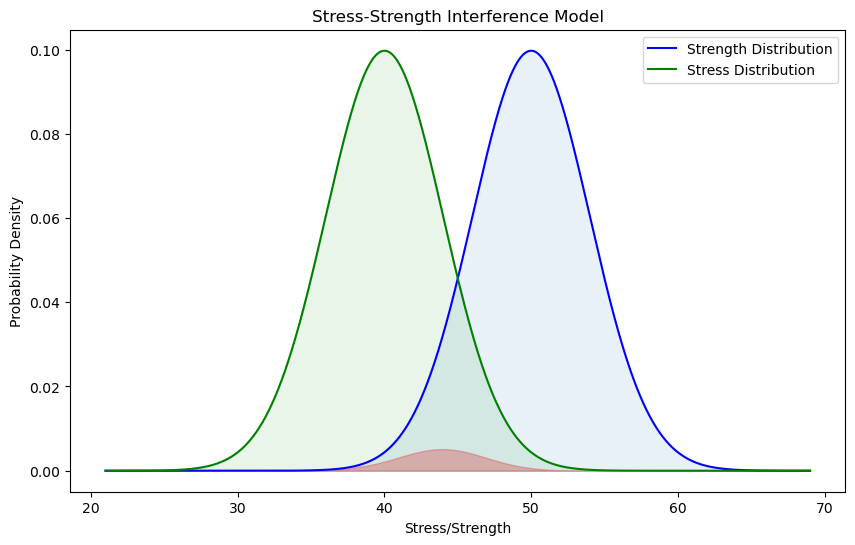

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


class StressStrengthModel:
    def __init__(self, stress_dist, strength_dist, num_points=1_000_000, range_precision=1e-6):
        """
        Initialize the stress-strength model with strength and stress distributions.

        Args:
        - stress_dist (scipy.stats distribution): Stress distribution.
        - strength_dist (scipy.stats distribution): Strength distribution.
        - num_points (int): Number of points for numerical integration.
        - range_precision (float): Precision for the range of integration.
        """
        self.stress_dist = stress_dist
        self.strength_dist = strength_dist
        self.num_points = num_points
        self.range_precision = range_precision
        self.n = num_points

        # Define the range for integration
        x_min = min(stress_dist.ppf(range_precision), strength_dist.ppf(range_precision))
        x_max = max(stress_dist.ppf(1 - range_precision), strength_dist.ppf(1 - range_precision))
        self.x = np.linspace(x_min, x_max, num_points)

        # Calculate integrand
        # self.strength_pdf = strength_dist.pdf(self.x)
        # self.stress_pdf = stress_dist.pdf(self.x)
        # self.stress_sf = stress_dist.sf(self.x)  # Survival function (1 - CDF)
        # self.integrand = self.strength_pdf * self.stress_sf  # Failure region


    
    def probability_of_failure(self, method='numerical'):
        """
    Calculates the probability of failure given the means and standard deviations
    of stress and strength distributions.

    Args:
    - mean_stress (float): Mean of the stress distribution.
    - std_stress (float): Standard deviation of the stress distribution.
    - mean_strength (float): Mean of the strength distribution.
    - std_strength (float): Standard deviation of the strength distribution.
    - method (str): Calculation method ('numerical' or 'monte_carlo').

    Returns:
    - float: Probability of failure.
            """
        if method == 'numerical':
            strength_pdf = self.strength_dist.pdf(self.x)
            stress_pdf = self.stress_dist.pdf(self.x)
            # stress_sf = self.stress_dist.sf(self.x)  # Survival function (1 - CDF) 
            integrand = strength_pdf * self.stress_dist.sf(self.x)  # Failure region
            # Perform numerical integration using np.trapz()
            probability_failure = np.trapezoid(integrand, self.x)
        
        elif method == 'equation':
            # Calculate the Z score
            Z = (self.mean_strength - self.mean_stress) / np.sqrt(self.std_stress**2 + self.std_strength**2)
            # Calculate the probability of failure using the standard normal CDF
            probability_failure = norm.cdf(-Z)
 
        elif method == 'monte_carlo':
            # Number of simulations
            n_simulations = 1000000
            # Generate random samples from stress and strength distributions
            stress_samples = self.stress_dist.rvs(size=n_simulations)
            strength_samples = self.strength_dist.rvs(size=n_simulations)
            # Calculate failure (stress > strength)
            failures = np.sum(stress_samples > strength_samples)
            # Probability of failure
            probability_failure = np.mean(failures) / n_simulations
  
        else:
            raise ValueError("Method not recognized. Use 'equation' or 'monte_carlo'.")

        return probability_failure

    def plot_distributions(self):
        """
        Plot the stress and strength distributions to visualize the overlap.
        """
        # Generate a range of x-values for plotting

        # Calculate the corresponding normal distribution for strength and stress
        strength_pdf = self.strength_dist.pdf(self.x)
        stress_pdf = self.stress_dist.pdf(self.x)
        integrand = strength_pdf * self.stress_dist.sf(self.x)  # Failure region

        # Plot the distributions
        plt.figure(figsize=(10, 6))
        plt.plot(self.x, strength_pdf, label="Strength Distribution", color='blue')
        plt.plot(self.x, stress_pdf, label="Stress Distribution", color='green')
        plt.fill_between(self.x, stress_pdf, 
                         color='tab:green', alpha=0.1, 
                         )
        plt.fill_between(self.x, strength_pdf, 
                         color='tab:blue', alpha=0.1, )
        plt.fill_between(self.x, integrand, 
                         color='tab:red', alpha=0.3, )
        plt.xlabel("Stress/Strength")
        plt.ylabel("Probability Density")
        plt.title("Stress-Strength Interference Model")
        plt.legend()
        plt.show()

#example
ssa = StressStrengthModel(
    stress_dist = stats.norm(loc=40, scale=4), 
    strength_dist = stats.norm(loc=50, scale=4)  
)

print(f"Probability of failure (Monte Carlo simulation): {ssa.probability_of_failure(method = 'monte_carlo'):.6%}")
print(f"Probability of failure (normal equation): {ssa.probability_of_failure():.6%}")
ssa.plot_distributions()


The python pacakge [`reliabilty`](https://github.com/MatthewReid854/reliability/tree/master) implemented the [stress-strength model. ](https://reliability.readthedocs.io/en/latest/Stress-Strength%20interference.html)  

Note that the area under the failure probability curve does not correspond to the interference area. A lot illustrations in the web and in the textbooks, and in the `reliability` package implementation, showing the failure probability as the interference area between stress and strength curves. Figure above shows that the value of interference area may significantly deviate from the correct one.

Stress - Strength Interference
Stress Distribution: Normal Distribution (μ=40,σ=4)
Strength Distribution: Normal Distribution (μ=50,σ=4)
Probability of failure (stress > strength): 3.85499 %


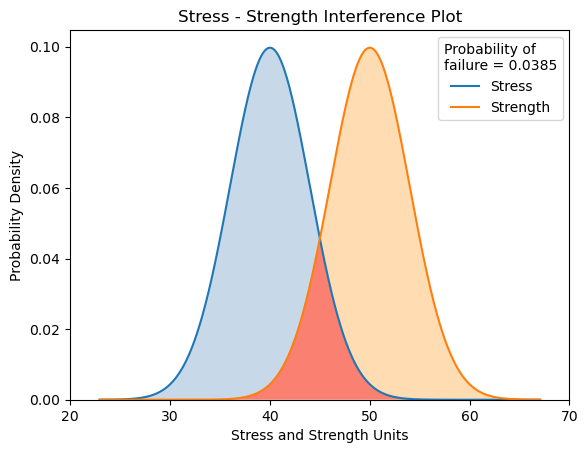

In [12]:
from reliability import Distributions
from reliability.Other_functions import stress_strength_normal

stress = Distributions.Normal_Distribution(mu=40,sigma=4)
strength = Distributions.Normal_Distribution(mu=50,sigma=4)
stress_strength_normal(stress=stress, strength=strength)
plt.xlim(20,70)
plt.show()

Stress - Strength Interference
Stress Distribution: Weibull Distribution (α=2,β=3,γ=1)
Strength Distribution: Gamma Distribution (α=2,β=3,γ=1)
Probability of failure (stress > strength): 7.18517 %


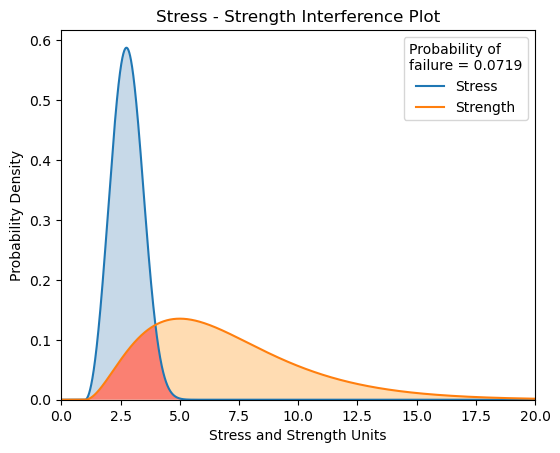

In [13]:
from reliability.Other_functions import stress_strength
stress = Distributions.Weibull_Distribution(alpha=2, beta=3, gamma=1)
strength = Distributions.Gamma_Distribution(alpha=2, beta=3, gamma=1)
stress_strength(stress=stress, strength=strength)
plt.xlim(0,20)
plt.show()

Probability of failure (Monte Carlo simulation): 7.215400%
Probability of failure (numerical): 7.185151%


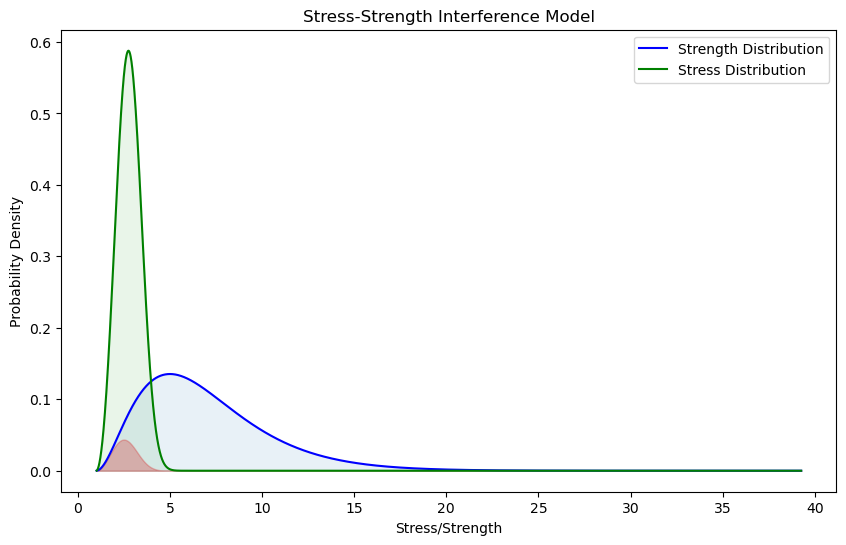

In [14]:
#non normal example
ssa = StressStrengthModel(
    stress_dist = stats.weibull_min(3, loc=1, scale=2), 
    strength_dist = stats.gamma(3, loc=1, scale=2)  
)

print(f"Probability of failure (Monte Carlo simulation): {ssa.probability_of_failure(method = 'monte_carlo'):.6%}")
print(f"Probability of failure (numerical): {ssa.probability_of_failure():.6%}")
ssa.plot_distributions()